In [32]:
import pandas as pd

import chess
import chess.svg

import IPython
from IPython.display import display, SVG, clear_output, HTML

from ipywidgets import widgets

import time

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import numpy as np

In [33]:
games_df = pd.read_csv("games.csv")

In [34]:
games_df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [35]:
def getwinners(r1, r2, winner):
    return len(games_df[(games_df[r1]>games_df[r2])&(games_df['winner']==winner)])*100/len(games_df[games_df[r1]>games_df[r2]])

In [36]:
print('Win percentage of white when white has a higher rating:', round(getwinners('white_rating', 'black_rating', 'white')))
print('Win percentage of black when white has a higher rating:', round(getwinners('white_rating', 'black_rating', 'black')))
print('Win percentage of black when black has a higher rating:', round(getwinners('black_rating', 'white_rating', 'black')))
print('Win percentage of white when black has a higher rating:', round(getwinners('black_rating', 'white_rating', 'white')))

Win percentage of white when white has a higher rating: 64
Win percentage of black when white has a higher rating: 31
Win percentage of black when black has a higher rating: 60
Win percentage of white when black has a higher rating: 35


As expected, the player with the higher rating usually wins the game. However, there is a difference of 4 percent between the black and white win percentage in each scenario-Almost like white has an advantage...

In [37]:
games_df['avrating'] = (games_df['white_rating']+games_df['black_rating'])/2

In [38]:
games_df.groupby('rated').agg({'avrating': 'mean'})

,avrating
rated,
False,1582.091596
True,1595.302600


There isn't much of a difference between player ratings in rated and unrated matches - about 13.2/1595 (less than one percent).

In [39]:
gamesrated = games_df[games_df['rated']]
gamesnotrated = games_df[~games_df['rated']]

In [40]:
print('Number of unrated games that white won:', len(gamesnotrated.query("winner == 'white'")))
print('Number of unrated games that black won:', len(gamesnotrated.query("winner == 'black'")))
print('Number of unrated games that ended in a draw:', len(gamesnotrated.query("winner == 'draw'")))

Number of unrated games that white won: 1949
Number of unrated games that black won: 1723
Number of unrated games that ended in a draw: 231


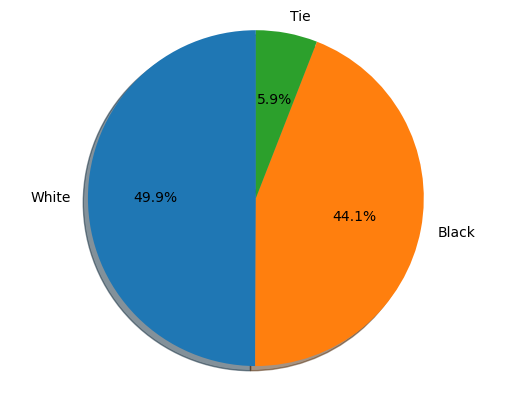

In [41]:
labels = 'White', 'Black', 'Tie'
sizes = [len(gamesnotrated.query("winner == 'white'"))*100/len(gamesnotrated), 
        len(gamesnotrated.query("winner == 'black'"))*100/len(gamesnotrated), 
        len(gamesnotrated.query("winner == 'draw'"))*100/len(gamesnotrated)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [42]:
print('Number of rated games that white won:', len(gamesrated.query("winner == 'white'")))
print('Number of rated games that black won:', len(gamesrated.query("winner == 'black'")))
print('Number of rated games that ended in a draw:', len(gamesrated.query("winner == 'draw'")))
len(gamesrated)

Number of rated games that white won: 8052
Number of rated games that black won: 7384
Number of rated games that ended in a draw: 719


16155

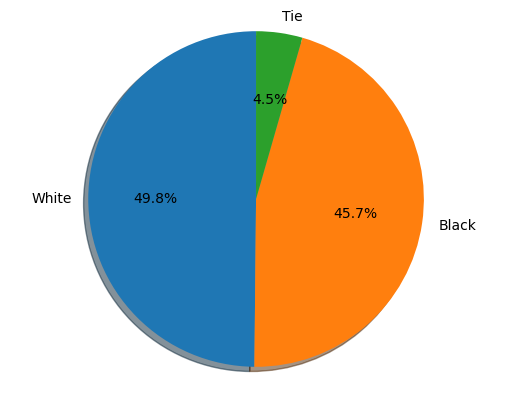

In [43]:
labels = 'White', 'Black', 'Tie'
sizes = [len(gamesrated.query("winner == 'white'"))*100/len(gamesrated), 
        len(gamesrated.query("winner == 'black'"))*100/len(gamesrated), 
        len(gamesrated.query("winner == 'draw'"))*100/len(gamesrated)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

The player playing white seems to have an obvious advantage over the player playing black, regardless of the ratings

In [44]:
games_df.groupby('winner').agg({'turns': 'mean'})

,turns
winner,
black,60.724388
draw,86.157895
white,57.790221


That's interesting. The matches that ended in a draw usually had more turns played than matches won by either side, as expected. However, the matches won by the player playing black seem to last more than 5 percent longer than those won by the player playing white.

In [45]:
games_df.groupby('rated').agg({'turns':'mean'})

,turns
rated,
False,54.271586
True,61.962550


The games that were rated generally had 7.7 more turns played per match than the unrated games

In [46]:
games150 = games_df.sample(300)

In [47]:
intercept, slope = np.polynomial.polynomial.polyfit(
    games150.avrating,
    games150.turns,
    1)
ratings = np.array([min(games150.avrating), max(games150.avrating)])
turns = intercept + slope * ratings

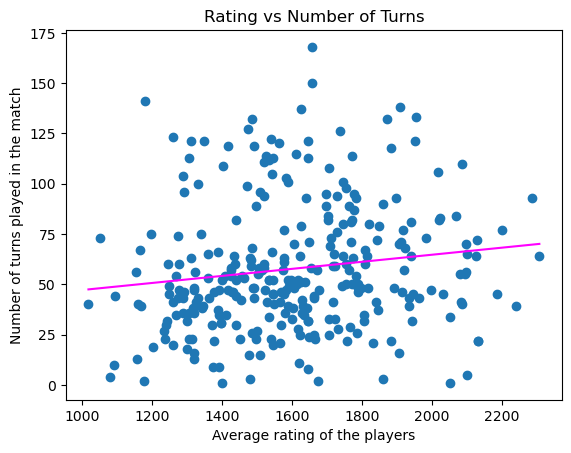

In [48]:
plt.scatter("avrating", "turns", data=games150)
plt.plot(ratings, turns, color="magenta")
plt.title("Rating vs Number of Turns")
plt.xlabel("Average rating of the players")
plt.ylabel("Number of turns played in the match")
plt.show()

Even though the turns per game were higher in rated games, the average rating of the players seemed to have no correlation with the turns played. The slight slope that can be seen seems to be
a result of the lack of data at the extreme ends

In [49]:
freq = games_df[games_df['winner']=='black']['opening_name'].value_counts()
print("Printing the frequency")
print(freq)

Printing the frequency
Van't Kruijs Opening                                               226
Sicilian Defense                                                   194
Sicilian Defense: Bowdler Attack                                   164
Scandinavian Defense                                               123
French Defense: Knight Variation                                   121
                                                                  ... 
Ruy Lopez: Closed Variations |  Yates Variation |  Short Attack      1
Queen's Gambit Accepted: Showalter Variation                         1
King's Gambit Accepted |  Greco Gambit                               1
Van Geet Opening: Dunst-Perrenet Gambit                              1
Pirc Defense: Austrian Attack |  Dragon Formation                    1
Name: opening_name, Length: 1145, dtype: int64


This series shows the openings with which the player playing black got the most wins.

In [50]:
print("Black win percentage when using the Van't Kruijs Opening:",
round(len(games_df[(games_df['opening_name']=="Van't Kruijs Opening")&(games_df['winner']=='black')])*100
/len(games_df[games_df['opening_name']=="Van't Kruijs Opening"]),2))
print('Black win percentage when using the Sicilian Defense:',
round(len(games_df[(games_df['opening_name']=="Sicilian Defense")&(games_df['winner']=='black')])*100
/len(games_df[games_df['opening_name']=="Sicilian Defense"]),2))
print('Black win percentage when using other openings: ', 
round(len(games_df[(games_df['winner']=='black')&(~games_df['opening_name'].isin(['Sicilian Defense', "Van't Kruijs Opening"]))])*100/len(games_df[~games_df['opening_name'].isin(['Sicilian Defense', "Van't Kruijs Opening"])]),2))

Black win percentage when using the Van't Kruijs Opening: 61.41
Black win percentage when using the Sicilian Defense: 54.19
Black win percentage when using other openings:  44.94


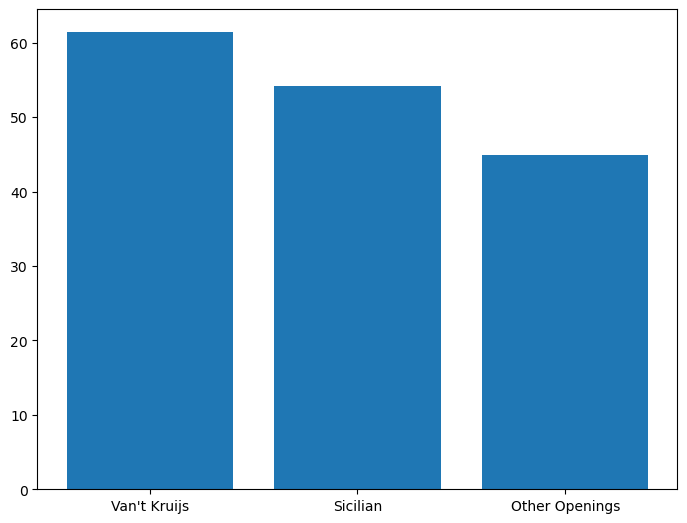

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
openings = ["Van't Kruijs", 'Sicilian', 'Other Openings']
percentages = [61.413, 54.19, 44.94]
ax.bar(openings, percentages)
plt.show()

We can see that the Van't Kruijs and Sicilain Defense openings provide black with a statistical advantage over the other openings

In [52]:
freq = games_df[games_df['winner']=='white']['opening_name'].value_counts()
print("Printing the frequency of the top 15 openings")
print(freq.head(15))

Printing the frequency of the top 15 openings
Scandinavian Defense: Mieses-Kotroc Variation    164
Sicilian Defense                                 149
Scotch Game                                      145
French Defense: Knight Variation                 135
Philidor Defense #3                              127
Van't Kruijs Opening                             126
Sicilian Defense: Bowdler Attack                 119
Queen's Pawn Game: Mason Attack                  116
Queen's Pawn Game: Chigorin Variation            112
Horwitz Defense                                  110
Caro-Kann Defense                                109
Italian Game: Anti-Fried Liver Defense            97
Four Knights Game: Italian Variation              95
Scandinavian Defense                              90
Philidor Defense #2                               89
Name: opening_name, dtype: int64


In [53]:
print('White win percentage when using the Scandinavian Defense: Mieses-Kotroc Variation:',
round(len(games_df[(games_df['opening_name']=="Scandinavian Defense: Mieses-Kotroc Variation")&(games_df['winner']=='white')])*100
/len(games_df[games_df['opening_name']=="Scandinavian Defense: Mieses-Kotroc Variation"]), 2))

print('White win percentage when using the Scotch Game:',
round(len(games_df[(games_df['opening_name']=="Scotch Game")&(games_df['winner']=='white')])*100
/len(games_df[games_df['opening_name']=="Scotch Game"]), 2))

print('White win percentage when using the Sicilian Defense:',
round(len(games_df[(games_df['opening_name']=="Sicilian Defense")&(games_df['winner']=='white')])*100
/len(games_df[games_df['opening_name']=="Sicilian Defense"]), 2))

print('White win percentage when using other openings:',
round(len(games_df[(games_df['winner']=='white')&(~games_df['opening_name'].isin(['Scandinavian Defense: Mieses-Kotroc Variation', "Scotch Game"]))])*100/len(games_df[~games_df['opening_name'].isin(['Scandinavian Defense: Mieses-Kotroc Variation', "Scotch Game"])]), 2))

White win percentage when using the Scandinavian Defense: Mieses-Kotroc Variation: 63.32
White win percentage when using the Scotch Game: 53.51
White win percentage when using the Sicilian Defense: 41.62
White win percentage when using other openings: 49.63


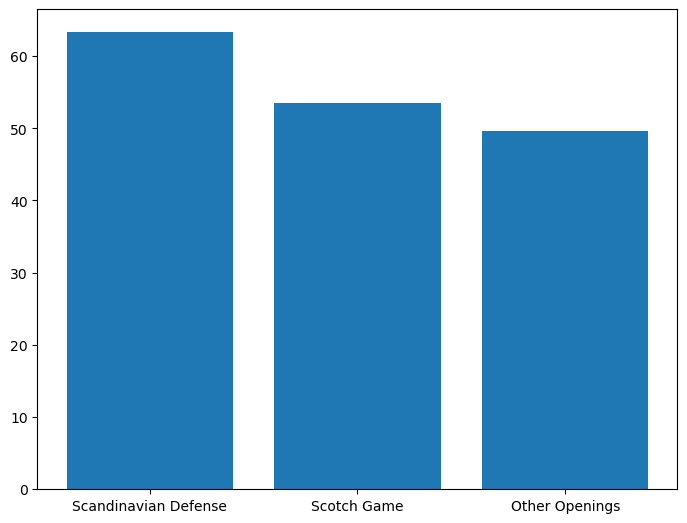

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
openings = ["Scandinavian Defense", 'Scotch Game', 'Other Openings']
percentages = [63.32, 53.506, len(games_df[(games_df['winner']=='white')&(~games_df['opening_name'].isin(['Scandinavian Defense: Mieses-Kotroc Variation', "Scotch Game"]))])*100/len(games_df[~games_df['opening_name'].isin(['Scandinavian Defense: Mieses-Kotroc Variation', "Scotch Game"])])]
ax.bar(openings, percentages)
plt.show()

The Scandinavian Defense: Mieses-Kotroc Variation and Scotch Game openings appear to provide white with a statistical advantage over the other openings

In [55]:
# # Function to draw the chess board
# def draw_board(board):
#     board_svg = chess.svg.board(board=board)
#     display(SVG(board_svg))

# # Function to convert moves from a descriptive format to UCI format
# def convert_moves(descriptive_moves):
#     uci_moves = []
#     board = chess.Board()
    
#     for move_str in descriptive_moves.split():
#         move = board.parse_san(move_str)
#         uci_moves.append(move.uci())
#         board.push(move)

#     return uci_moves

# # Function to animate the moves
# def animate_moves(moves):
#     board = chess.Board()

#     for move in moves:
#         board.push_uci(move)
#         clear_output(wait=True)
#         draw_board(board)
#         time.sleep(.1)  # adjust the speed of the animation

# # Replace this with your actual chess moves
# descriptive_moves = 'd4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O-O O-O-O Nb5 Nb4 Rc1 Nxa2 Ra1 Nb4 Nxa7+ Kb8 Nb5 Bxc2 Bxc7+ Kc8 Qd2 Qc6 Na7+ Kd7 Nxc6 bxc6 Bxd8 Kxd8 Qxb4 e5 Qb8+ Ke7 dxe5 Be4 Ra7+ Ke6 Qe8+ Kf5 Qxf7+ Nf6 Nh4+ Kg5 g3 Ng4 Qf4+ Kh5 Qxg4+ Kh6 Qf4+ g5 Qf6+ Bg6 Nxg6 Bg7 Qxg7#'

# # Convert descriptive moves to UCI format
# uci_moves_sequence = convert_moves(descriptive_moves)

# animate_moves(uci_moves_sequence)


In [56]:
def opening_move_plot(games):
    # Split moves into individual moves
    all_moves = ' '.join(games['moves']).split()

    # Count the occurrences of each move
    move_counts = pd.Series(all_moves).value_counts()

    # Plot the top N opening moves
    top_n = 10  # You can adjust this value
    move_counts.head(top_n).plot(kind='bar', color='skyblue')
    plt.title('Top Opening Moves')
    plt.xlabel('Move')
    plt.ylabel('Frequency')
    plt.show()
    
def win_percentage_plot(games):
    labels = 'White', 'Black', 'Stalemate'
    sizes = [len(games.query("winner == 'white'"))*100/len(games), 
        len(games.query("winner == 'black'"))*100/len(games), 
        len(games.query("winner == 'draw'"))*100/len(games)]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.title(f'Win percentages')
    plt.show()
    
def rating_difference_impact(games):
    # Calculate the rating difference for each game
    games['rating_difference'] = games['white_rating'] - games['black_rating']

    # Create bins for rating differences
    bins = [-400, -200, -100, 0, 100, 200, 400]
    labels = ['<-200', '-200 to -100', '-100 to 0', '0 to 100', '100 to 200', '200+']
    games['rating_difference_group'] = pd.cut(games['rating_difference'], bins=bins, labels=labels, right=False)

    # Calculate win percentages for each rating difference group
    win_percentages = games.groupby('rating_difference_group')['winner'].value_counts(normalize=True).unstack().fillna(0)
    
    # Plot the win percentages
    win_percentages.plot(kind='bar', stacked=True, colormap='coolwarm_r')
    plt.title('Win Percentage Based on Rating Difference')
    plt.xlabel('Rating Difference')
    plt.ylabel('Win Percentage')
    plt.legend(title='Winner', loc='upper right')
    plt.show()

In [57]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_colwidth', None)
def show_data(opening_name):
    #filter dataframe to matches with user chosen opening name
    games = games_df[games_df['opening_name'] == opening_name]
    
    #get dataframe with calculated mean values for each column
    games_describe = games.describe().loc['mean']
    
    #display statistics and plots about chosen opening in first output window
    with out:
        print(f"Games in dataset with this opening: {len(games)}")
        print(f"Mean turns per game: {round(games_describe['turns'])}")
        print(f"Mean overall rating: {round(games_describe['avrating'])}")
        print(f"Mean white rating: {round(games_describe['white_rating'])}")
        print(f"Mean black rating: {round(games_describe['black_rating'])}")
        win_percentage_plot(games)
        opening_move_plot(games)
        rating_difference_impact(games.copy())
    
    #display dataframe of matches with chosen opening
    with out2:
        #convert avrating column to integer type so the dataframe can be sorted by it
        display(games.assign(avrating = lambda x: x['avrating'].astype(int))
                     .sort_values(by = 'avrating', ascending = False)
                     #copy victory_status column's data into new victory column to shorten dataframe width
                     .assign(victory = lambda df: df['victory_status'])
                     #display relevant columns to user
                     [['avrating', 'white_rating', 'black_rating', 'winner', 'victory', 'turns', 'id']]
                     #hide index
                     .style.hide())
    
#create output windows
out = widgets.Output(layout={'border': '1px solid black'})
out2 = widgets.Output(layout={'border': '1px solid black', 'width': '65%'})
out3 = widgets.Output(layout={'border': '1px solid black'})

#create button to clear output windows
clear_button = widgets.Button(description = 'clear output')
#define method that runs when button is clicked
def clear_print(button=None):
    out.clear_output()
    out2.clear_output()
    out3.clear_output()
#link clear_button to clear_print function
clear_button.on_click(clear_print)


#get all opening names used over 25 times in dataset
options = games_df.opening_name.value_counts().loc[lambda x: x > 25].index.sort_values()
# Create a Dropdown widget with list of selected opening names
dropdown = widgets.Dropdown(options = options,
    value=None,  # Default selected option
    description='Select an opening:',
    style={'description_width': 'initial'})
# Function to handle the dropdown value change event
def on_dropdown_change(change):
    selected_option = change['new']
    show_data(selected_option)   
# Attach the event handler to the dropdown widget
dropdown.observe(on_dropdown_change, names='value')


#create text box to take in game id input
text_box_id = widgets.Textarea(
    value='',
    description='Enter the game id to simulate:',
    layout={'width': '350px', 'height': '25px'},
    style={'description_width': 'initial'})

#create text box to take in number of seconds input
text_box_seconds = widgets.Textarea(
    value='1',
    description='Enter seconds between each turn:',
    layout={'width': '350px', 'height': '25px'},
    style={'description_width': 'initial'})

simulate_button = widgets.Button(description = 'simulate')
def simulate(button = None):
    with out3:
        # Function to draw the chess board
        board_svg = chess.svg.board(board=chess.Board())
        display(SVG(board_svg))

        # Replace this with your actual chess moves
        descriptive_moves = games_df.loc[games_df['id'] == text_box_id.value, 'moves'].values[0]

        # Convert descriptive moves to UCI format
        uci_moves = []
        board = chess.Board()

        for move_str in descriptive_moves.split():
            move = board.parse_san(move_str)
            uci_moves.append(move.uci())
            board.push(move)

        # Function to animate the moves
        board = chess.Board()
        for move in uci_moves:
            board.push_uci(move)
            clear_output(wait=True)
            board_svg = chess.svg.board(board=board)
            display(SVG(board_svg))
            time.sleep(float(text_box_seconds.value))  # Adjust the speed of the animation
simulate_button.on_click(simulate)    
    
    
#format and display widgets and outputs
display(widgets.HBox([dropdown, clear_button]))
display(widgets.HBox([out, out2])) 
display(widgets.HBox([text_box_id, text_box_seconds, simulate_button]))
display(out3)

Output(layout=Layout(border='1px solid black'))